In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ds = pd.read_excel(r"E:\Data_Train.xlsx")

In [3]:
ds

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 500.8+ KB


In [5]:
ds["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
35h 35m      1
35h 20m      1
13h 35m      1
29h 40m      1
32h 20m      1
Name: Duration, Length: 368, dtype: int64

In [6]:
ds.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
ds.shape

(10683, 11)

In [8]:
ds.dropna(inplace=True)

In [9]:
ds.shape

(10682, 11)

In [10]:
ds["Journey_day"] = pd.to_datetime(ds.Date_of_Journey,format="%d/%m/%Y").dt.day 
ds["Journey_day"]

0        24
1         1
2         9
3        12
4         1
         ..
10678     9
10679    27
10680    27
10681     1
10682     9
Name: Journey_day, Length: 10682, dtype: int64

In [11]:
ds["Journey_month"] = pd.to_datetime(ds.Date_of_Journey,format="%d/%m/%Y").dt.month 
ds["Journey_month"]

0        3
1        5
2        6
3        5
4        3
        ..
10678    4
10679    4
10680    4
10681    3
10682    5
Name: Journey_month, Length: 10682, dtype: int64

In [12]:
ds

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3


In [13]:
ds.drop(["Date_of_Journey"],axis=1,inplace=True)

In [14]:
ds

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3


In [15]:
ds["dep_hour"]=pd.to_datetime(ds.Dep_Time).dt.hour

In [16]:
ds["dep_min"]=pd.to_datetime(ds.Dep_Time).dt.minute

In [17]:
ds.drop(["Dep_Time"],axis=1,inplace=True)

In [18]:
ds

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,dep_hour,dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,22:25,2h 30m,non-stop,No info,4107,9,4,19,55
10679,Air India,Kolkata,Banglore,CCU → BLR,23:20,2h 35m,non-stop,No info,4145,27,4,20,45
10680,Jet Airways,Banglore,Delhi,BLR → DEL,11:20,3h,non-stop,No info,7229,27,4,8,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,14:10,2h 40m,non-stop,No info,12648,1,3,11,30


In [19]:
ds["arr_hour"]=pd.to_datetime(ds.Arrival_Time).dt.hour

In [20]:
ds["arr_min"]=pd.to_datetime(ds.Arrival_Time).dt.minute

In [21]:
ds

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,dep_hour,dep_min,arr_hour,arr_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,22:25,2h 30m,non-stop,No info,4107,9,4,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,23:20,2h 35m,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,11:20,3h,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,14:10,2h 40m,non-stop,No info,12648,1,3,11,30,14,10


In [22]:
ds.drop(["Arrival_Time"],axis=1,inplace=True)

In [23]:
ds

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,dep_hour,dep_min,arr_hour,arr_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,9,4,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,1,3,11,30,14,10


In [24]:
duration=list(ds["Duration"])
duration

['2h 50m',
 '7h 25m',
 '19h',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 20m',
 '18h',
 '9h 15

In [25]:


for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour



In [26]:
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [27]:
ds["Duration_hours"] = duration_hours
ds["Duration_mins"] = duration_mins

In [28]:
ds.drop(["Duration"],axis=1,inplace=True)

In [29]:
ds

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,dep_hour,dep_min,arr_hour,arr_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,1,3,11,30,14,10,2,40


In [30]:
ds["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [31]:
ds.drop(ds.index[(ds["Airline"]=="Jet Airways")],inplace=True)
ds.drop(ds.index[(ds["Airline"]=="Jet Airways Business")],inplace=True)
        

In [32]:
ds["Airline"].value_counts()

IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [33]:
ds.shape

(6827, 15)

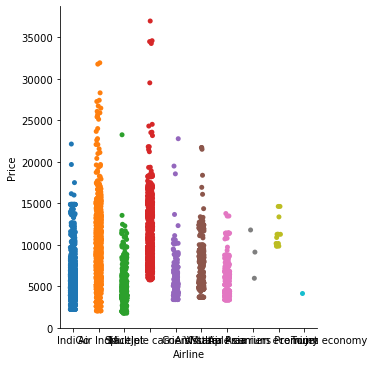

In [34]:
sns.catplot(y = "Price", x = "Airline", data = ds)
plt.show()

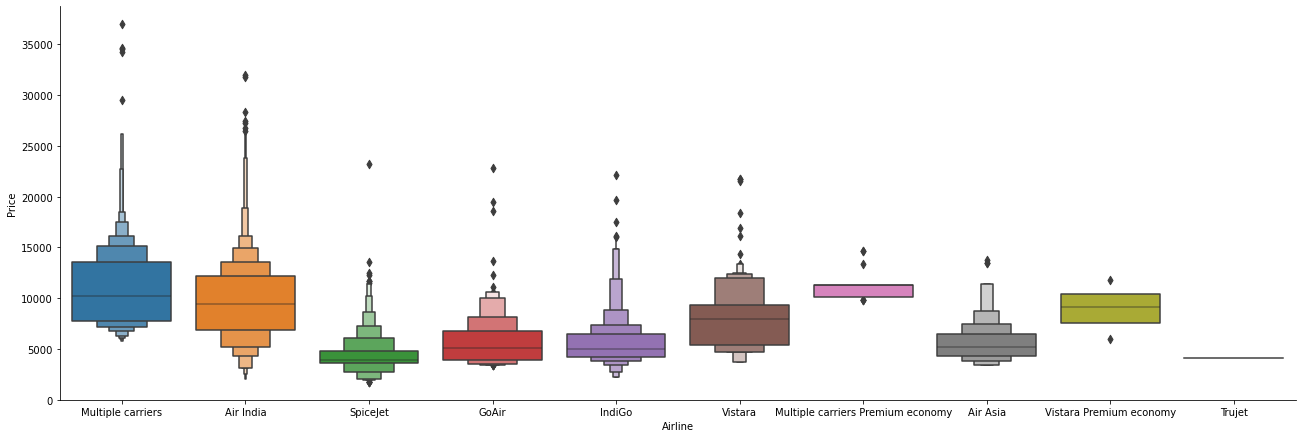

In [35]:
sns.catplot(y = "Price", x = "Airline", data = ds.sort_values("Price", ascending = False), 
            kind="boxen", height = 6, aspect = 3)
plt.show()

In [36]:
#one hot encoding
Airline = ds[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0


In [37]:
ds["Source"].value_counts()

Delhi       2948
Kolkata     1615
Banglore    1405
Mumbai       478
Chennai      381
Name: Source, dtype: int64

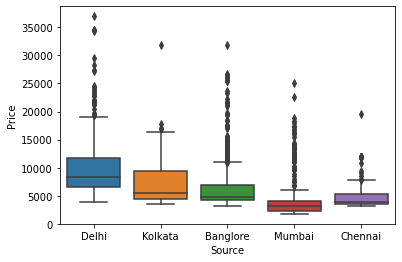

In [38]:
sns.boxplot(y = "Price", x = "Source", data = ds.sort_values("Price", ascending = False))
            
plt.show()

In [39]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = ds[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
3,0,0,1,0
4,0,0,0,0
5,0,0,1,0


In [40]:
ds["Destination"].value_counts()

Cochin       2948
Banglore     1615
Delhi         895
New Delhi     510
Hyderabad     478
Kolkata       381
Name: Destination, dtype: int64

In [41]:
ds=ds.replace("New Delhi","Delhi")

In [42]:
ds["Destination"].value_counts()

Cochin       2948
Banglore     1615
Delhi        1405
Hyderabad     478
Kolkata       381
Name: Destination, dtype: int64

In [43]:
Destination = ds[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,1,0,0
1,0,0,0,0
3,0,0,0,0
4,0,1,0,0
5,0,0,0,0


In [44]:
ds['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
3              CCU → NAG → BLR
4              BLR → NAG → DEL
5                    CCU → BLR
                 ...          
10677                BLR → DEL
10678                CCU → BLR
10679                CCU → BLR
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 6827, dtype: object

In [45]:
ds.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [46]:
ds["Total_Stops"].value_counts()

1 stop      3086
non-stop    2868
2 stops      827
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [47]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

ds.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [48]:
ds1 = pd.concat([ds, Airline, Source, Destination], axis = 1)

In [49]:
ds1

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,dep_hour,dep_min,arr_hour,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,IndiGo,Banglore,Delhi,0,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,1,0,0
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,0,0,0,0,1,0,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,...,0,0,0,0,1,0,0,0,0,0
4,IndiGo,Banglore,Delhi,1,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,1,0,0
5,SpiceJet,Kolkata,Banglore,0,3873,24,6,9,0,11,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,SpiceJet,Banglore,Delhi,0,3257,21,5,5,55,8,...,0,0,0,0,0,0,0,1,0,0
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,19,55,22,...,0,0,0,0,1,0,0,0,0,0
10679,Air India,Kolkata,Banglore,0,4145,27,4,20,45,23,...,0,0,0,0,1,0,0,0,0,0
10681,Vistara,Banglore,Delhi,0,12648,1,3,11,30,14,...,1,0,0,0,0,0,0,1,0,0


In [50]:
ds1.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [51]:
ds1

,Total_Stops,Price,Journey_day,Journey_month,dep_hour,dep_min,arr_hour,arr_min,Duration_hours,Duration_mins,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,1,0,0
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,0,1,0,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,0,1,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,1,0,0
5,0,3873,24,6,9,0,11,25,2,25,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,0,3257,21,5,5,55,8,35,2,40,...,0,0,0,0,0,0,0,1,0,0
10678,0,4107,9,4,19,55,22,25,2,30,...,0,0,0,0,1,0,0,0,0,0
10679,0,4145,27,4,20,45,23,20,2,35,...,0,0,0,0,1,0,0,0,0,0
10681,0,12648,1,3,11,30,14,10,2,40,...,1,0,0,0,0,0,0,1,0,0


In [52]:
ds1.shape

(6827, 27)

In [53]:
ds1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6827 entries, 0 to 10682
Data columns (total 27 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Total_Stops                                6827 non-null   int64
 1   Price                                      6827 non-null   int64
 2   Journey_day                                6827 non-null   int64
 3   Journey_month                              6827 non-null   int64
 4   dep_hour                                   6827 non-null   int64
 5   dep_min                                    6827 non-null   int64
 6   arr_hour                                   6827 non-null   int64
 7   arr_min                                    6827 non-null   int64
 8   Duration_hours                             6827 non-null   int64
 9   Duration_mins                              6827 non-null   int64
 10  Airline_Air India                          6827

# Test set

In [54]:
ts = pd.read_excel(r"E:\Test_set.xlsx")

In [55]:
ts

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


Preprocessing

In [56]:
print("Test data Info")

print(ts.info())

Test data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 104.4+ KB
None


In [57]:
ts.isnull().sum()



Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [58]:
ts.dropna(inplace = True)
print(ts.isnull().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64


EDA

In [59]:
# Date_of_Journey
ts["Journey_day"] = pd.to_datetime(ts.Date_of_Journey, format="%d/%m/%Y").dt.day
ts["Journey_month"] = pd.to_datetime(ts.Date_of_Journey, format = "%d/%m/%Y").dt.month
ts.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [60]:
# Dep_Time
ts["Dep_hour"] = pd.to_datetime(ts["Dep_Time"]).dt.hour
ts["Dep_min"] = pd.to_datetime(ts["Dep_Time"]).dt.minute
ts.drop(["Dep_Time"], axis = 1, inplace = True)


In [61]:
# Arrival_Time
ts["Arrival_hour"] = pd.to_datetime(ts.Arrival_Time).dt.hour
ts["Arrival_min"] = pd.to_datetime(ts.Arrival_Time).dt.minute
ts.drop(["Arrival_Time"], axis = 1, inplace = True)

In [62]:
# Duration
duration = list(ts["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
ts["Duration_hours"] = duration_hours
ts["Duration_mins"] = duration_mins
ts.drop(["Duration"], axis = 1, inplace = True)

In [63]:
# Categorical data

print("Airline")
print(ts["Airline"].value_counts())
Airline = pd.get_dummies(ts["Airline"], drop_first= True)

Airline
Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Jet Airways Business                   2
Vistara Premium economy                2
Name: Airline, dtype: int64


In [64]:
ds.drop(ds.index[(ds["Airline"]=="Jet Airways")],inplace=True)
ds.drop(ds.index[(ds["Airline"]=="Jet Airways Business")],inplace=True)
ts=ts.replace("New Delhi","Delhi")

In [65]:
ds["Source"].value_counts()

Delhi       2948
Kolkata     1615
Banglore    1405
Mumbai       478
Chennai      381
Name: Source, dtype: int64

In [66]:
print("Source")

print(ts["Source"].value_counts())
Source = pd.get_dummies(ts["Source"], drop_first= True)

Source
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64


In [67]:
ds["Destination"].value_counts()

Cochin       2948
Banglore     1615
Delhi        1405
Hyderabad     478
Kolkata       381
Name: Destination, dtype: int64

In [68]:
print("Destination")
print(ts["Destination"].value_counts())
Destination = pd.get_dummies(ts["Destination"], drop_first = True)

Destination
Cochin       1145
Banglore      710
Delhi         555
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64


In [69]:
print(ts["Destination"].value_counts())

Cochin       1145
Banglore      710
Delhi         555
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64


In [70]:
ts.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [71]:
ts.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [72]:
ts1 = pd.concat([ts, Airline, Source, Destination], axis = 1)

In [73]:
ts1.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)



In [74]:
ts1

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,...,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata
0,1,6,6,17,30,4,25,10,55,0,...,0,0,0,1,0,0,1,0,0,0
1,1,12,5,6,20,10,20,4,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,0,0,1,0,0,1,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,0,0,1,0,0,1,0,0,0
4,0,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,6,6,20,30,20,25,23,55,1,...,0,0,0,0,1,0,0,0,0,0
2667,0,27,3,14,20,16,55,2,35,0,...,0,0,0,0,1,0,0,0,0,0
2668,1,6,3,21,50,4,25,6,35,0,...,0,0,0,1,0,0,1,0,0,0
2669,1,6,3,4,0,19,15,15,15,1,...,0,0,0,1,0,0,1,0,0,0


In [75]:
ts1

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,...,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata
0,1,6,6,17,30,4,25,10,55,0,...,0,0,0,1,0,0,1,0,0,0
1,1,12,5,6,20,10,20,4,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,0,0,1,0,0,1,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,0,0,1,0,0,1,0,0,0
4,0,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,6,6,20,30,20,25,23,55,1,...,0,0,0,0,1,0,0,0,0,0
2667,0,27,3,14,20,16,55,2,35,0,...,0,0,0,0,1,0,0,0,0,0
2668,1,6,3,21,50,4,25,6,35,0,...,0,0,0,1,0,0,1,0,0,0
2669,1,6,3,4,0,19,15,15,15,1,...,0,0,0,1,0,0,1,0,0,0


## Feature Selection

In [76]:
ds1.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'dep_hour',
       'dep_min', 'arr_hour', 'arr_min', 'Duration_hours', 'Duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata'],
      dtype='object')

In [77]:
ds1

,Total_Stops,Price,Journey_day,Journey_month,dep_hour,dep_min,arr_hour,arr_min,Duration_hours,Duration_mins,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,1,0,0
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,0,1,0,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,0,1,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,1,0,0
5,0,3873,24,6,9,0,11,25,2,25,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,0,3257,21,5,5,55,8,35,2,40,...,0,0,0,0,0,0,0,1,0,0
10678,0,4107,9,4,19,55,22,25,2,30,...,0,0,0,0,1,0,0,0,0,0
10679,0,4145,27,4,20,45,23,20,2,35,...,0,0,0,0,1,0,0,0,0,0
10681,0,12648,1,3,11,30,14,10,2,40,...,1,0,0,0,0,0,0,1,0,0


In [78]:
X = ds1.loc[:, ['Total_Stops',  'Journey_day', 'Journey_month', 'dep_hour',
       'dep_min', 'arr_hour', 'arr_min', 'Duration_hours', 'Duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata']]
X.head()

,Total_Stops,Journey_day,Journey_month,dep_hour,dep_min,arr_hour,arr_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,1,0,0
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,0,1,0,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,0,1,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,1,0,0
5,0,24,6,9,0,11,25,2,25,0,...,0,0,0,0,1,0,0,0,0,0


In [79]:
y = ds1.iloc[:, 1]
y.head()

0     3897
1     7662
3     6218
4    13302
5     3873
Name: Price, dtype: int64

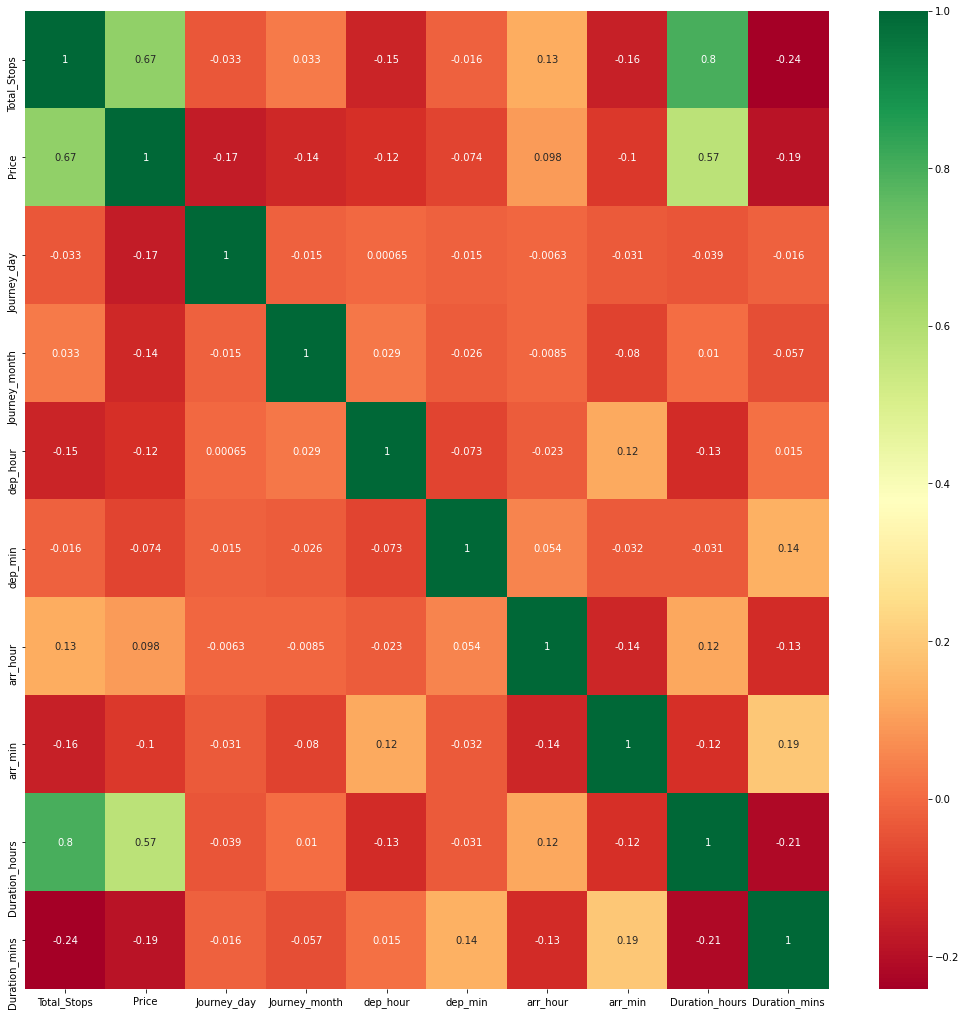

In [80]:
plt.figure(figsize = (18,18))
sns.heatmap(ds.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [81]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [82]:
print(selection.feature_importances_)

[2.83941260e-01 1.18249200e-01 8.34989877e-02 3.40972977e-02
 3.53508766e-02 3.16256363e-02 2.76650623e-02 1.41178399e-01
 2.42487146e-02 3.38820092e-02 3.35464857e-03 2.19887168e-02
 4.55047887e-02 2.06325865e-03 7.55523341e-03 2.30700166e-04
 1.14639823e-02 1.78902162e-04 1.48492200e-03 3.57481948e-02
 8.73023376e-03 5.89641704e-03 2.60544300e-02 8.21928917e-03
 6.50945800e-03 1.27938091e-03]


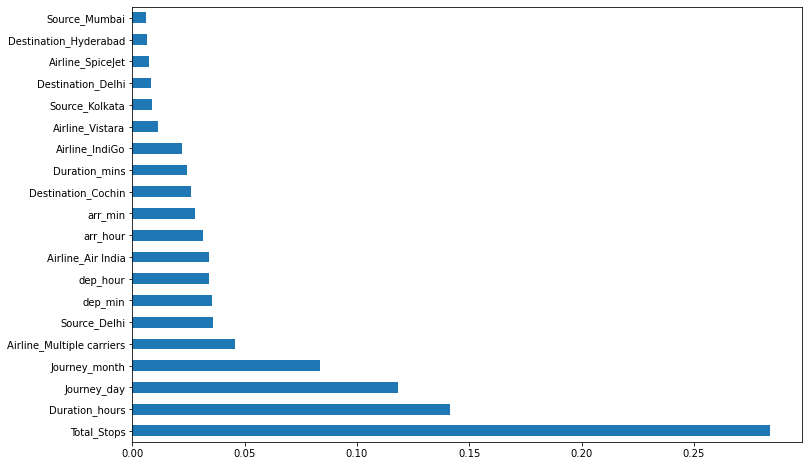

In [83]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [85]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [86]:
y_pred = reg_rf.predict(X_test)

In [87]:
reg_rf.score(X_train, y_train)

0.9734217545715064

In [88]:
reg_rf.score(X_test, y_test)

0.8229045184041429

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


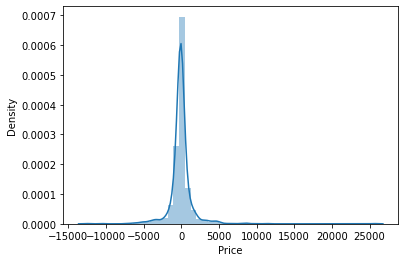

In [89]:
sns.distplot(y_test-y_pred)
plt.show()

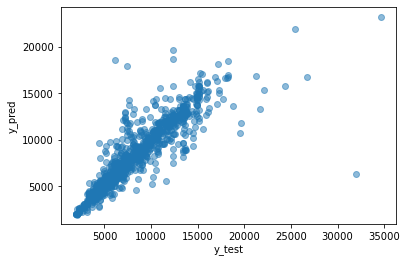

In [90]:

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [91]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 762.6529909162742
MSE: 2608689.7809310793
RMSE: 1615.1438886152155


In [92]:
# RMSE/(max(DV)-min(DV))

2090.5509/(max(y)-min(y))

0.05935018453327277

In [93]:
metrics.r2_score(y_test, y_pred)

0.8229045184041429

## Hyperparameter Tuning

* Choose following method for hyperparameter tuning
    1. **RandomizedSearchCV** --> Fast
    2. **GridSearchCV**
* Assign hyperparameters in form of dictionery
* Fit the model
* Check best paramters and best score

In [94]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [95]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [96]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [97]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  13.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.7s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  14.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  14.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  13.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  13.2s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  19.9s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   7.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   7.5s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   7.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   7.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   7.5s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 14.4min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [98]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [99]:
prediction = rf_random.predict(X_test)

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


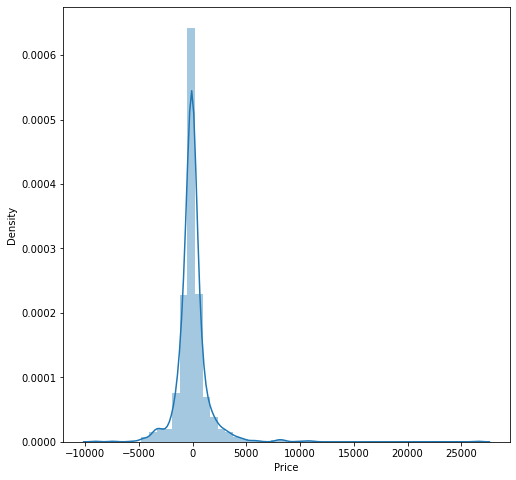

In [100]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

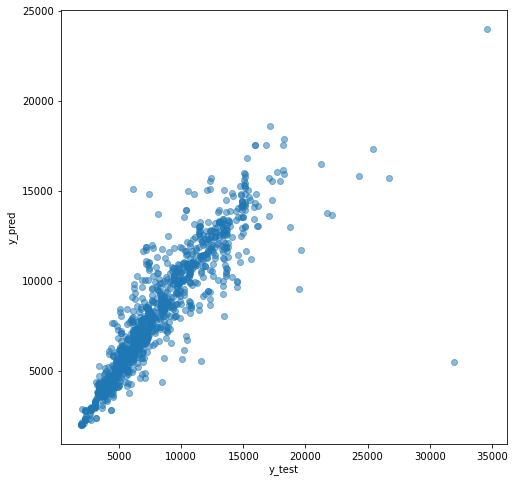

In [101]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [102]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 818.7306117774234
MSE: 2503300.597896825
RMSE: 1582.1822265140083


# Save the model

In [103]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(reg_rf, file)

In [104]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [105]:
y_prediction = forest.predict(X_test)

In [106]:
metrics.r2_score(y_test, y_prediction)

0.8229045184041429